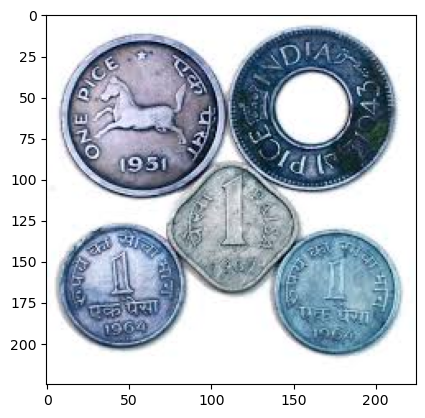

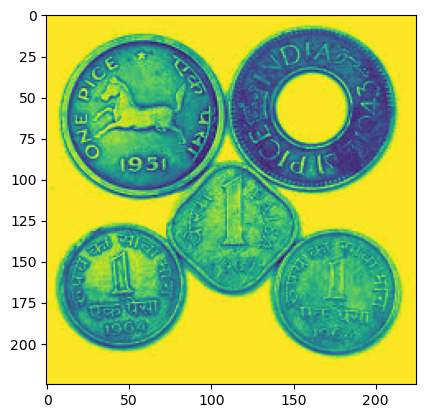

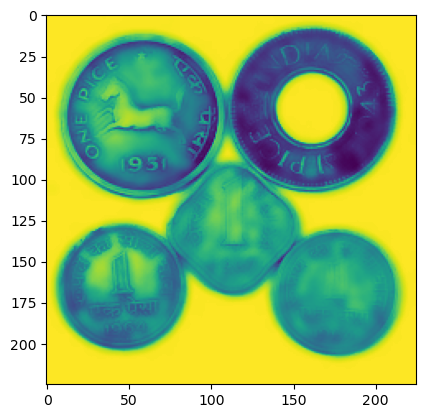

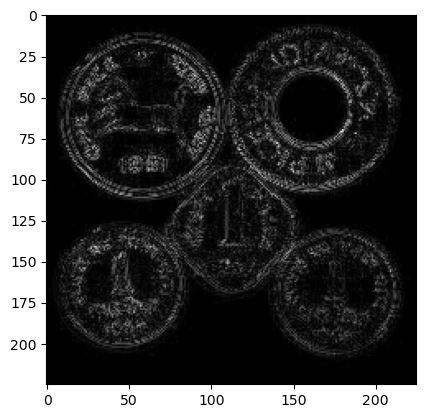

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('C:\\Users\\chari\\OneDrive\\Documents\\Sliit\\Y3S1\\DIP\\Lab 6\\coin1.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bilateral_filtered_img = cv2.bilateralFilter(gray_img, 9, 75, 75)

edges_laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)

plt.imshow(img)
plt.show()

plt.imshow(gray_img)
plt.show()

plt.imshow(bilateral_filtered_img)
plt.show()

plt.imshow(np.abs(edges_laplacian), cmap='gray')
plt.show()

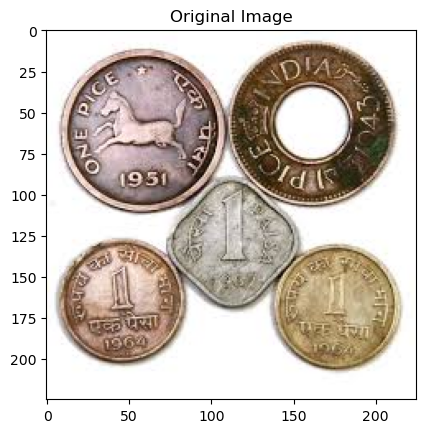

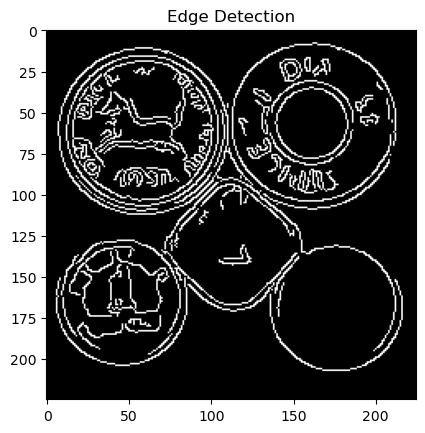

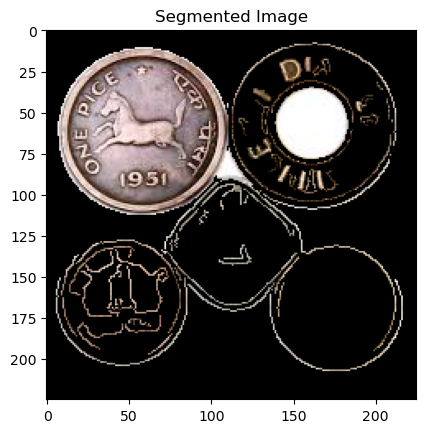

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('C:\\Users\\chari\\OneDrive\\Documents\\Sliit\\Y3S1\\DIP\\Lab 6\\coin1.jpg')


gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
edges = cv2.Canny(blurred_img, 100, 200)


contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(img)
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)
segmented_img = cv2.bitwise_and(img, mask)



plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

plt.title('Edge Detection')
plt.imshow(edges, cmap='gray')
plt.show()

plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
plt.show()



In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('C:\\Users\\chari\\OneDrive\\Documents\\Sliit\\Y3S1\\DIP\\Lab 6\\plate1.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
edges = cv2.Canny(blurred_img, 100, 200)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)


line_img = np.copy(img)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)


cv2.imshow('Original Image', img)
cv2.imshow('Edge Image', edges)
cv2.imshow("line image", line_img)
cv2.waitKey(0) 

32

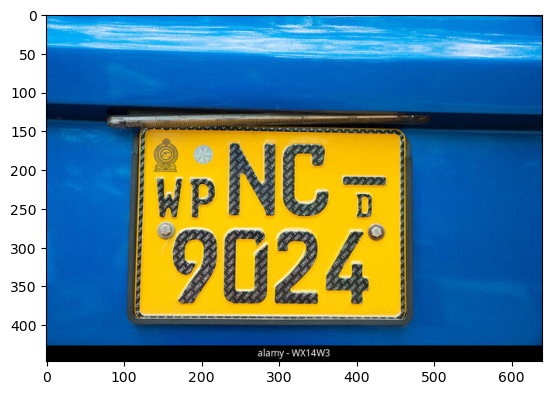

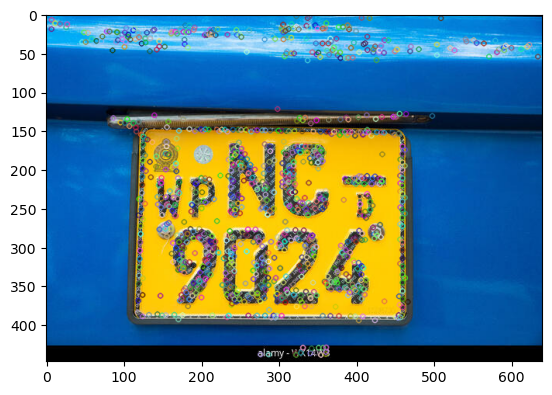

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('C:\\Users\\chari\\OneDrive\\Documents\\Sliit\\Y3S1\\DIP\\Lab 6\\plate1.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_img, None)
keypoint_img = cv2.drawKeypoints(img, keypoints, None)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(keypoint_img, cv2.COLOR_BGR2RGB))
plt.show()